In [1]:
from models.mnist_classifier.lenet import LeNet5, LeNet1
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset, ConcatDataset
import random
import os
from  PIL import Image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms,utils,datasets
import numpy as np
from torch import optim
import time
import torchvision.models as models
from pylab import *

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [2]:
data_root = './autodl-tmp/mnist'
data_train = MNIST(data_root,
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))
data_test = MNIST(data_root,
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))

In [3]:
len(data_train)

60000

In [4]:
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=256, num_workers=8)

In [5]:
net = LeNet1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)  #学习率，太高如2e-3会立马收敛，cagfuzz里设置为0.05

In [6]:
epoch = 100

In [7]:
def train(epoch):
    global cur_batch_win
    net.train()
    loss_list, batch_list = [], []
    total_correct = 0
    for i, (images, labels) in enumerate(data_train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()
        # if i % 10 == 0:
            # print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))
        loss.backward()
        optimizer.step()
    avg_loss = sum(loss_list) / len(loss_list)
    acc = float(total_correct) / len(data_train)
    print('Train Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [8]:
def test():
    net.eval()
    batch_list = []
    with torch.no_grad():
        total_correct = 0
        avg_loss = 0.0
        for i, (images, labels) in enumerate(data_test_loader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images)
            avg_loss += criterion(output, labels).sum()
            pred = output.detach().max(1)[1]
            total_correct += pred.eq(labels.view_as(pred)).sum()
            batch_list.append(i+1)

    avg_loss /= batch_list[-1]
    avg_loss = avg_loss.detach().cpu().item()
    acc = float(total_correct) / len(data_test)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [9]:
def train_and_test(epoch):
    print('training...')
    acc, loss = train(epoch)
    val_acc, val_loss = test()
    return acc, loss, val_acc, val_loss

In [10]:
acc, loss, val_acc, val_loss = [], [], [], []

start = time.time()
for e in range(epoch):
    a, b, c, d = train_and_test(e)
    acc.append(a)
    loss.append(b)
    val_acc.append(c)
    val_loss.append(d)
    print(f'lenet_epoch={e} test_acc={c:0.3f}')
    if e % 10 == 0:
        torch.save(net.state_dict(), f'autodl-tmp/save_model/mnist/Lenet1/epoch={e}_test_acc={c:0.3f}.pth')
end = time.time()
# 计算并打印输出你的训练时间
print("total time:{}".format(end - start))

training...
Train Avg. Loss: 2.050258, Accuracy: 0.455800
Test Avg. Loss: 1.668465, Accuracy: 0.677900
lenet_epoch=0 test_acc=0.678
training...
Train Avg. Loss: 1.311926, Accuracy: 0.731883
Test Avg. Loss: 0.990612, Accuracy: 0.785500
lenet_epoch=1 test_acc=0.785
training...
Train Avg. Loss: 0.863998, Accuracy: 0.802617
Test Avg. Loss: 0.718271, Accuracy: 0.831500
lenet_epoch=2 test_acc=0.832
training...
Train Avg. Loss: 0.677409, Accuracy: 0.834133
Test Avg. Loss: 0.590234, Accuracy: 0.855900
lenet_epoch=3 test_acc=0.856
training...
Train Avg. Loss: 0.578654, Accuracy: 0.852800
Test Avg. Loss: 0.514439, Accuracy: 0.868900
lenet_epoch=4 test_acc=0.869
training...
Train Avg. Loss: 0.515251, Accuracy: 0.864633
Test Avg. Loss: 0.463500, Accuracy: 0.879800
lenet_epoch=5 test_acc=0.880
training...
Train Avg. Loss: 0.470337, Accuracy: 0.874500
Test Avg. Loss: 0.424221, Accuracy: 0.888600
lenet_epoch=6 test_acc=0.889
training...
Train Avg. Loss: 0.435430, Accuracy: 0.881817
Test Avg. Loss: 0.

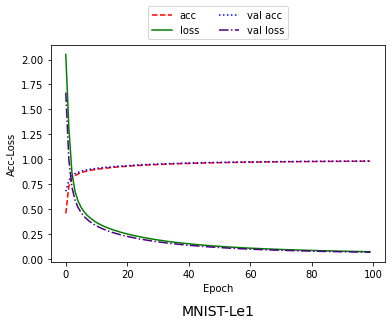

In [11]:
x = np.arange(epoch)
plt.plot(x, acc, color='red', linestyle='--', label="acc")
plt.plot(x, loss, color='green', label="loss")
plt.plot(x, val_acc, color='blue', linestyle='dotted', label="val acc")
plt.plot(x, val_loss, color='indigo', linestyle='dashdot', label="val loss")
plt.title('MNIST-Le1', fontsize=14, y=-0.27)
plt.xlabel('Epoch')
plt.ylabel('Acc-Loss')
plt.xticks(ticks=[0,20,40,60,80,100])
# 添加图例
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.1),ncol=2)
plt.show()

In [12]:
val_acc

[0.6779,
 0.7855,
 0.8315,
 0.8559,
 0.8689,
 0.8798,
 0.8886,
 0.8944,
 0.8999,
 0.9043,
 0.9084,
 0.9128,
 0.9169,
 0.919,
 0.9212,
 0.9238,
 0.9272,
 0.9299,
 0.9311,
 0.9332,
 0.9343,
 0.9371,
 0.9394,
 0.9415,
 0.9432,
 0.9449,
 0.9464,
 0.9481,
 0.9488,
 0.9501,
 0.951,
 0.9523,
 0.9539,
 0.9547,
 0.9563,
 0.9568,
 0.9578,
 0.959,
 0.9603,
 0.961,
 0.9617,
 0.9617,
 0.9632,
 0.9639,
 0.9638,
 0.9656,
 0.9666,
 0.9666,
 0.9671,
 0.9677,
 0.9678,
 0.9685,
 0.9691,
 0.9705,
 0.9706,
 0.9713,
 0.9715,
 0.9719,
 0.9722,
 0.9726,
 0.9731,
 0.9733,
 0.9735,
 0.9739,
 0.9739,
 0.9743,
 0.9748,
 0.9755,
 0.9751,
 0.9754,
 0.9763,
 0.9757,
 0.9764,
 0.9768,
 0.9767,
 0.977,
 0.9778,
 0.9776,
 0.978,
 0.9784,
 0.9784,
 0.9782,
 0.9789,
 0.9793,
 0.9789,
 0.9795,
 0.9797,
 0.9797,
 0.9797,
 0.9798,
 0.98,
 0.9797,
 0.9797,
 0.9804,
 0.9801,
 0.9805,
 0.9808,
 0.9813,
 0.9814,
 0.9813]

In [13]:
val_loss

[1.668465256690979,
 0.9906123280525208,
 0.7182710766792297,
 0.5902344584465027,
 0.5144394040107727,
 0.4634999930858612,
 0.4242210388183594,
 0.39437440037727356,
 0.3693658411502838,
 0.3483780324459076,
 0.3309231698513031,
 0.3150111138820648,
 0.30074238777160645,
 0.2886141836643219,
 0.27723273634910583,
 0.2666376233100891,
 0.2572859227657318,
 0.24826984107494354,
 0.23997049033641815,
 0.23254242539405823,
 0.22502544522285461,
 0.21837745606899261,
 0.21193289756774902,
 0.20585110783576965,
 0.1998690664768219,
 0.19441571831703186,
 0.18914267420768738,
 0.18428948521614075,
 0.17918914556503296,
 0.17461971938610077,
 0.1705009788274765,
 0.16656078398227692,
 0.1625288873910904,
 0.15843017399311066,
 0.15517476201057434,
 0.15156035125255585,
 0.14834752678871155,
 0.1453295797109604,
 0.14205209910869598,
 0.13885575532913208,
 0.13643912971019745,
 0.13345502316951752,
 0.1311935931444168,
 0.12895534932613373,
 0.1259058564901352,
 0.1236034408211708,
 0.1212805

In [14]:
acc

[0.4558,
 0.7318833333333333,
 0.8026166666666666,
 0.8341333333333333,
 0.8528,
 0.8646333333333334,
 0.8745,
 0.8818166666666667,
 0.8882833333333333,
 0.8934833333333333,
 0.8977666666666667,
 0.9022333333333333,
 0.9060666666666667,
 0.9095333333333333,
 0.9130166666666667,
 0.9164833333333333,
 0.9194333333333333,
 0.9222666666666667,
 0.9255166666666667,
 0.9269666666666667,
 0.9289666666666667,
 0.9314166666666667,
 0.93355,
 0.9352166666666667,
 0.9373166666666667,
 0.9390666666666667,
 0.9407166666666666,
 0.9425,
 0.9440666666666667,
 0.9450833333333334,
 0.9466666666666667,
 0.9480333333333333,
 0.9489833333333333,
 0.9506,
 0.9517,
 0.9529666666666666,
 0.954,
 0.9548833333333333,
 0.9557166666666667,
 0.9565166666666667,
 0.9576,
 0.9581666666666667,
 0.9594333333333334,
 0.9601833333333334,
 0.9609,
 0.9616666666666667,
 0.9624,
 0.9632666666666667,
 0.9636666666666667,
 0.9643666666666667,
 0.9651666666666666,
 0.9658166666666667,
 0.9661333333333333,
 0.9666,
 0.96715,


In [15]:
loss

[2.0502579942662664,
 1.311925994335337,
 0.8639984749733134,
 0.6774085255379373,
 0.5786541818304265,
 0.5152512871204539,
 0.470336666639815,
 0.4354300005638853,
 0.4080502539239031,
 0.3848773871330505,
 0.36440167617290575,
 0.3474119558613351,
 0.3324597181157863,
 0.3184254353350781,
 0.30668392942306844,
 0.29516209433687496,
 0.28467732097240206,
 0.2752107657016592,
 0.2658408319696467,
 0.25729428998967435,
 0.24950222791509424,
 0.24193566048398932,
 0.23500300731430662,
 0.2283749708469878,
 0.22193295061588286,
 0.215757765414867,
 0.21002700284440468,
 0.2042943170413058,
 0.19892295776529514,
 0.19420444109338394,
 0.1891860694961345,
 0.18476529511365486,
 0.1801169585040275,
 0.17595359343797604,
 0.17179049113963513,
 0.16814733471008056,
 0.16416584922278182,
 0.1605783205083076,
 0.1573272832847656,
 0.15402523726224898,
 0.15082247758165318,
 0.14795422366958982,
 0.14488360656702773,
 0.14241803167982303,
 0.13933954346687236,
 0.1367766428818094,
 0.13454671342